# Source
- https://www.kaggle.com/datasets/bumba5341/advertisingcsv/data
- 참고:
    - https://www.kaggle.com/code/fatmamuhsen/sales-prediction
    - https://www.kaggle.com/code/diphylleia/linear-regression-and-gradient-descent

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bumba5341/advertisingcsv")

print("Path to dataset files:", path)

100%|██████████| 2.26k/2.26k [00:00<00:00, 625kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bumba5341/advertisingcsv/versions/1


In [2]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [6]:
df = pd.read_csv(path+"/Advertising.csv")

In [9]:
print(df.info())

print("\n\n")
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None





,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
# Unnamed: 0 컬럼을 인덱스로 지정
df =pd.read_csv(path+"/Advertising.csv", index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# DDA (Descriptive Data Analysis)

In [18]:
df.info()
print("=================================================")
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
# 결측치 없음 (200 non-null)
# 공백 없음 (위의 정보 + float64)

# EDA

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

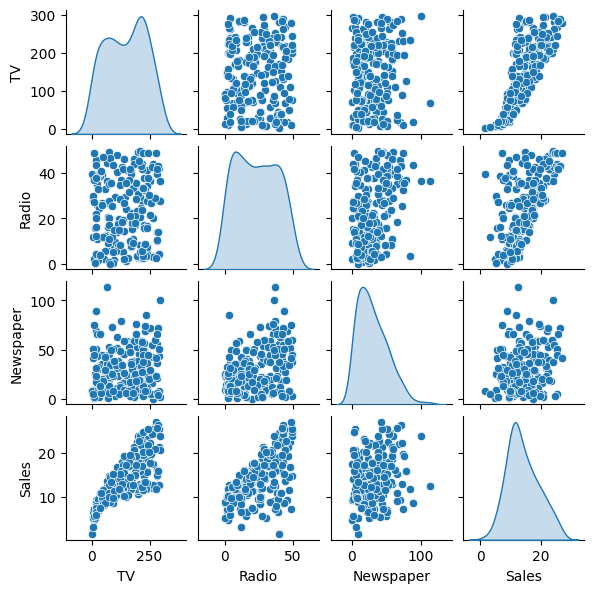

In [83]:
sns.pairplot(df, diag_kind='kde', height=1.5, aspect=1)

In [84]:
# Sales는 TV, Radio와 시각적으로 상관관계가 있는 것으로 보임
# Newspaper는 낮은 값에 많이 분포되어있음
# Sales는 뾰족한 정규분포로 보이기도 함

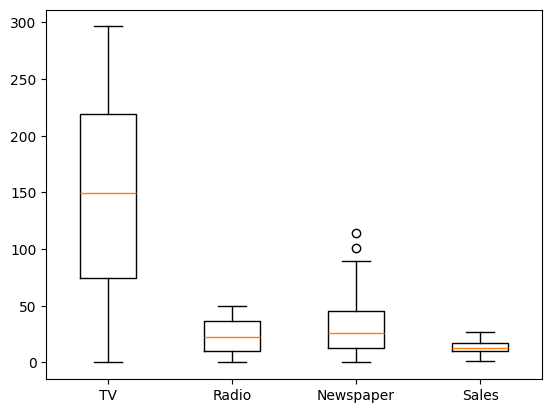

In [41]:
plt.boxplot(df)
plt.xticks(ticks = range(1, len(df.columns) +1), labels=df.columns)  # labels는 ticks없이 설정 불가
plt.show()

In [42]:
# Newspaper열에서 이상치 두개 확인

In [43]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


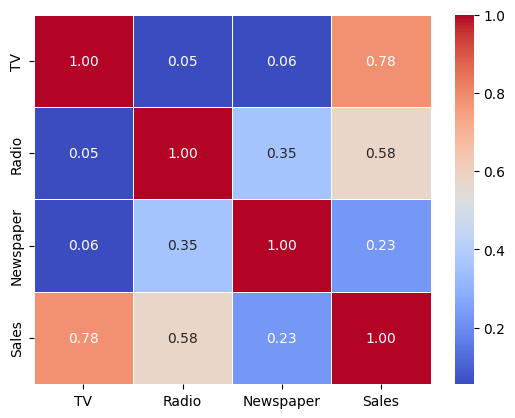

In [74]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths = 0.5)
plt.show()

- 상관관계 판단
    - 0.0 ~ ±0.20: 거의 상관없거나 매우 약한 상관성
    - ±0.20 ~ ±0.40: 약한 상관성
    - ±0.40 ~ ±0.60: 중간(보통) 상관성
    - ±0.60 ~ ±0.80: 강한 상관성
    - ±0.80 ~ ±1.00: 매우 강한 상관성

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF 라이브러리
                                                                                               # 다중공선성 확인
vif_list = []
for i in range(0, len(df.columns)):
    vif_list.append(variance_inflation_factor(df.values, i))

In [66]:
vif_df = pd.DataFrame()
vif_df['feature'] = df.columns
vif_df['vif'] = vif_list
vif_df

,feature,vif
0,TV,23.198876
1,Radio,12.570312
2,Newspaper,3.153498
3,Sales,55.303920


In [67]:
# 짧은 버전
vif_df = pd.DataFrame()
vif_df['feature'] = df.columns
vif_df['vif'] = [ variance_inflation_factor(df.values, num) for num in range(0, len(df.columns))] # 컴프리헨션
vif_df

,feature,vif
0,TV,23.198876
1,Radio,12.570312
2,Newspaper,3.153498
3,Sales,55.303920


- VIF 판단
    - VIF = 1:
        - 완벽한 독립. 해당 변수가 다른 변수와 전혀 상관 없음.
    - 1 < VIF < 5 (또는 10):
        - 일반적으로 허용 가능한 수준. 경미한 다중 공선성은 있을 수 있으나, 모델에 큰 문제 없음.
    - VIF ≥ 5 (또는 10):
        - 심각한 다중 공선성 문제 존재 가능.
        회귀 계수 추정치가 불안정해지고, 해석이 어려워짐.

In [ ]:
# 공선성 문제로 인해 차원축소(PCA), 규제(L1, L2) 시도 고려

# 데이터 분리

In [91]:
from sklearn.model_selection import train_test_split

X = df.drop("Sales", axis=1)
y = df["Sales"]
print(X.shape, y.shape)

print('\n')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            random_state=2025,
                                                            test_size = 0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(200, 3) (200,)


(160, 3) (40, 3) (160,) (40,)


In [94]:
X_train

,TV,Radio,Newspaper
188,191.1,28.7,18.2
131,0.7,39.6,8.7
49,227.2,15.8,49.9
139,43.0,25.9,20.5
192,75.5,10.8,6.0
...,...,...,...
141,73.4,17.0,12.9
68,139.3,14.5,10.2
77,27.5,1.6,20.7
95,107.4,14.0,10.9


# 스케일링
- 적용 이유:
    - 결과해석 용이(계수 확인 시 단위가 같아 확인 용이)
    - 계산 효율 (경사 하강법 기반 최적화 시 수렴 속도 향상)
    - 규제(L1, L2) 적용 시 공정성 확보 (패널티가 불공평하게 적용되는 것을 방지)

In [109]:
# 스케일링
# Min-Max, standard, Robust
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# 스케일러 초기화 - Min-Max, standard, Robust
min_max = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

# 학습 및 train 변환 (fit_transform 사용)
min_max_X_train = min_max.fit_transform(X_train)
standard_X_train = standard.fit_transform(X_train)
robust_X_train = robust.fit_transform(X_train)

# test 변환 (transform 사용)
min_max_X_test = min_max.transform(X_test)
standard_X_test = standard.transform(X_test)
robust_X_test = robust.transform(X_test)

- 스케일링을 train에만 적용하는 이유
    - 테스트 데이터에 fit_transform()을 사용하면, 모델이 아직 보지 못해야 할 테스트 데이터의
    - 통계량(평균, 표준편차 등)이 스케일링 과정에서 모델에 "누수(leakage)" 발생.
    - 이는 테스트 세트의 정보를 미리 엿보는 것과 같아서, 모델의 성능을 실제보다 과대평가하게 만듬.

In [112]:
# 추후 반복문으로 성능을 보기 위해 딕셔너리 생성

scaled_datasets_train = {
    '원본 데이터': X_train,
    'Min-Max 스케일링': min_max_X_train,
    'Standard 스케일링': standard_X_train,
    'Robust 스케일링': robust_X_train
}

scaled_datasets_test = {
    '원본 데이터': X_test,
    'Min-Max 스케일링': min_max_X_test,
    'Standard 스케일링': standard_X_test,
    'Robust 스케일링': robust_X_test
}

# 모델 선택/학습/평가

In [113]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # 선형회귀, 릿지, 라쏘

In [124]:
# 테스트할 모델
models_to_test = {
    "기본 선형회귀": LinearRegression,
    "Lasso 규제": Lasso,
    "Ridge 규제": Ridge
}

# --- 4. 반복문을 통한 모델 학습 및 점수 출력 ---
print("--- 각 스케일링 및 모델별 성능 평가 ---")

for scale_name in scaled_datasets_train.keys():
    print(f"\n===== 데이터셋: {scale_name} =====")
    X_train_scaled = scaled_datasets_train[scale_name]
    X_test_scaled = scaled_datasets_test[scale_name]

    for model_name, ModelClass in models_to_test.items():
        # 모델 인스턴스 생성 (각 스케일링 데이터셋마다 새로 생성)
        if model_name == "Lasso 규제":
            model = ModelClass(alpha=0.1)  # 일반적 값 0.1 사용. 실제로는 GridSearchCV 등으로 최적 alpha 찾기 필요

        elif model_name == "Ridge 규제":
            model = ModelClass(alpha=1.0)  # 일반적 값 1.0 사용

        else:
            model = ModelClass() # LinearRegression은 파라미터 없이 초기화

        # 모델 학습
        model.fit(X_train_scaled, y_train)

        # 점수 출력
        print(f"  [{model_name}]")
        print(f"    학습 점수: {model.score(X_train_scaled, y_train):.6f}")
        print(f"    일반화 점수: {model.score(X_test_scaled, y_test):.6f}")

--- 각 스케일링 및 모델별 성능 평가 ---

===== 데이터셋: 원본 데이터 =====
  [기본 선형회귀]
    학습 점수: 0.903283
    일반화 점수: 0.865724
  [Lasso 규제]
    학습 점수: 0.903281
    일반화 점수: 0.865976
  [Ridge 규제]
    학습 점수: 0.903283
    일반화 점수: 0.865725

===== 데이터셋: Min-Max 스케일링 =====
  [기본 선형회귀]
    학습 점수: 0.903283
    일반화 점수: 0.865724
  [Lasso 규제]
    학습 점수: 0.895139
    일반화 점수: 0.863862
  [Ridge 규제]
    학습 점수: 0.899390
    일반화 점수: 0.860333

===== 데이터셋: Standard 스케일링 =====
  [기본 선형회귀]
    학습 점수: 0.903283
    일반화 점수: 0.865724
  [Lasso 규제]
    학습 점수: 0.902462
    일반화 점수: 0.868202
  [Ridge 규제]
    학습 점수: 0.903250
    일반화 점수: 0.865580

===== 데이터셋: Robust 스케일링 =====
  [기본 선형회귀]
    학습 점수: 0.903283
    일반화 점수: 0.865724
  [Lasso 규제]
    학습 점수: 0.901032
    일반화 점수: 0.868083
  [Ridge 규제]
    학습 점수: 0.902987
    일반화 점수: 0.865182


In [125]:
# 유의미한 성능 변화는 없지만 아주 근소한 차이로
# 스케일링, 규제 방법에 따라 성능 향상을 확인할 수 있음.

# 큰 차이가 없으므로 PCA 진행하지 않음

- 성능지표 확인

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model_lr = LinearRegression()

model_lr.fit(standard_X_train, y_train)
pred = model_lr.predict(standard_X_test)

print("--- 회귀 모델 성능 지표 ---")

# 1. R-squared (결정계수)
r2 = r2_score(y_test, pred)
print(f"R-squared (결정계수): {r2:.4f}")

# 2. MAE (Mean Absolute Error, 평균 절대 오차)
mae = mean_absolute_error(y_test, pred)
print(f"MAE (평균 절대 오차): {mae:.4f}")

# 3. MSE (Mean Squared Error, 평균 제곱 오차)
mse = mean_squared_error(y_test, pred)
print(f"MSE (평균 제곱 오차): {mse:.4f}")

# 4. RMSE (Root Mean Squared Error, 제곱 평균 제곱근 오차)
rmse = np.sqrt(mse)
print(f"RMSE (제곱 평균 제곱근 오차): {rmse:.4f}")

--- 회귀 모델 성능 지표 ---
R-squared (결정계수): 0.8657
MAE (평균 절대 오차): 1.4046
MSE (평균 제곱 오차): 3.5084
RMSE (제곱 평균 제곱근 오차): 1.8731


- 설명력 86.57%
- 실제 Slae값과 모델의 예측값은 평균적으로 1.8731 차이가 남

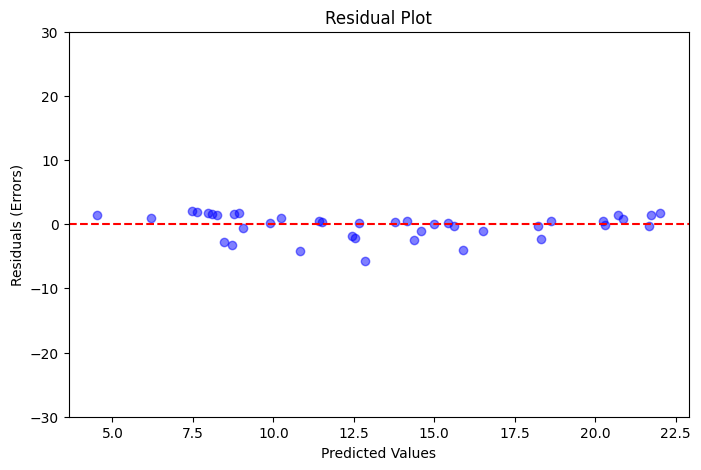

In [136]:
residuals = y_test - pred
plt.figure(figsize=(8,5))
plt.scatter(pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.ylim(-30, 30)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

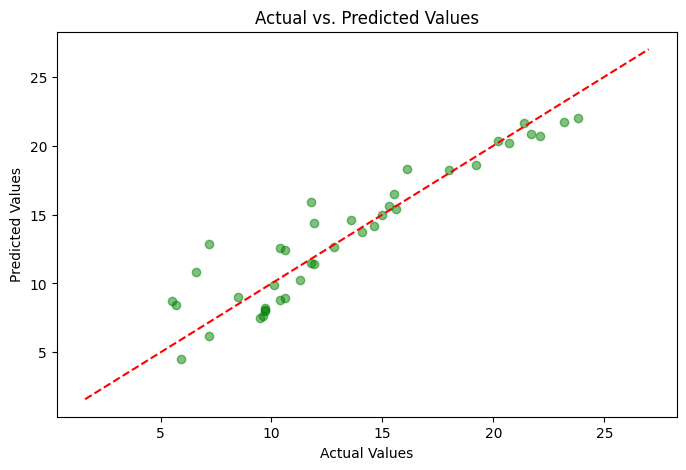

In [137]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, pred, color="green", alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()